In [75]:
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
# import spacy

nltk.download('vader_lexicon')
nltk.download('rslp')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yonix42\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\yonix42\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yonix42\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
dados = pd.read_csv("MGLU3.csv")

In [35]:
def combinar_paragrafos(texto_lista):
    texto = ' '.join(texto_lista.strip("[]").replace("'", "").split(", "))
    return texto

dados['texto'] = dados['texto'].apply(combinar_paragrafos)

In [37]:
analisador = SentimentIntensityAnalyzer()

In [39]:
def analisar_sentimento(texto):
    return analisador.polarity_scores(texto)

In [41]:
dados['sentimento'] = dados['texto'].apply(analisar_sentimento)

In [42]:
teste = dados['sentimento']

In [65]:
token_espaco = tokenize.WhitespaceTokenizer()
frase_processada = list()
for noticia in dados.texto:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(noticia)
    stemmer = nltk.RSLPStemmer()
    for palavra in palavras_texto:
        nova_frase.append(stemmer.stem(palavra))
        frase_processada.append(' '.join(nova_frase))

    wordnet_lemmatizer = WordNetLemmatizer()

    for palavra in palavras_texto:
        nova_frase.append(wordnet_lemmatizer.lemmatize(palavra))
        frase_processada.append(' '.join(nova_frase))


In [78]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras=' '.join([texto for texto in texto[coluna_texto]])
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
    "Frequencia":list(frequencia.values())})
    plt.figure(figsize = (12,8))
    ax=sns.barplot(data = df_frequencia.nlargest(columns="Frequencia",  n=10), x="Palavra", y="Frequencia", color="gray")
    ax.set(ylabel="Contagem")
    plt.show()

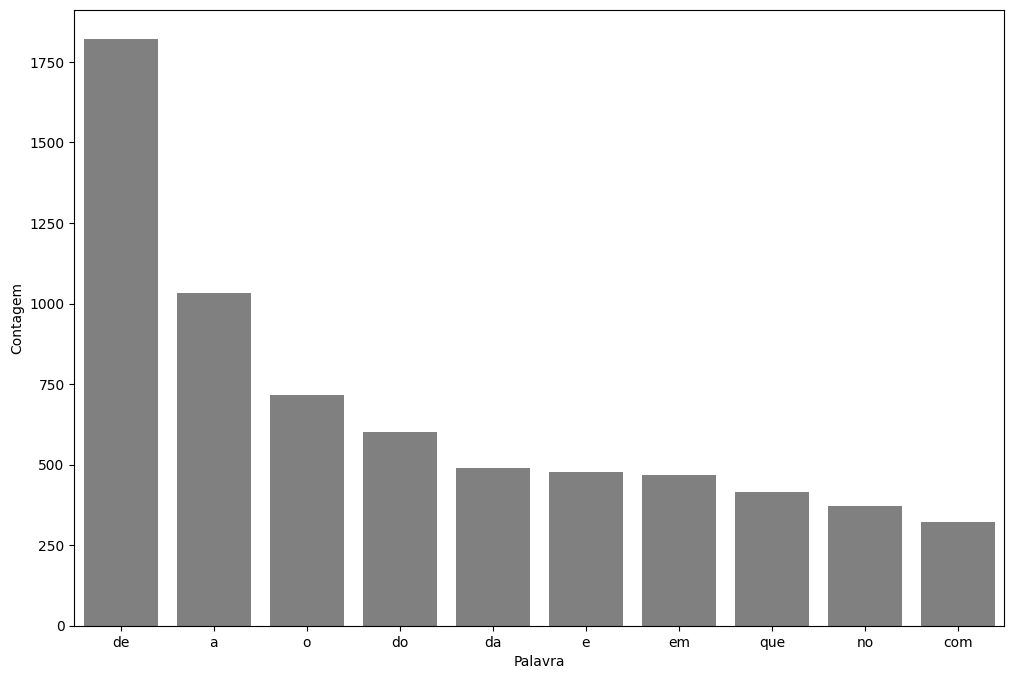

In [80]:
pareto(dados,"texto",10)